# Bears and Hippos Classification

## The images in the data/train and data/val folders used in this project are sourced from images.cv and universe.roboflow.com.

In [1]:
import random
import numpy as np
import torch.nn as nn
from torchvision.models import resnet50, ResNet50_Weights
from dataclasses import dataclass, field
from utils.utils import *

In [2]:
@dataclass
class Config:
    seed: int = 42
    lr: float = 1e-3
    num_epochs: int = 20
    n_classes: int = 2
    batch_size: int = 64
    img_size: int = 64
    train_dir: str = 'data/train'
    val_dir: str = 'data/val'
    test_dir: str = 'data/my_photos'
    class_names: list = field(default_factory=lambda: ["bear", "hippo"])  # bear: 0, hippo: 1
        
config = Config()

In [3]:
# Set random seeds for reproducibility across experiments
def set_seed(seed):
    random.seed(seed)  # Python random module
    np.random.seed(seed)  # NumPy random module
    torch.manual_seed(seed)  # PyTorch CPU random generator
    torch.cuda.manual_seed(seed)  # PyTorch GPU random generator
    torch.cuda.manual_seed_all(seed)  # PyTorch random generator for all GPUs
    torch.backends.cudnn.deterministic = True  # Ensure deterministic results on CUDA

set_seed(config.seed)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [5]:
class SimpleCnnModel(nn.Module):
    def __init__(self, img_size=64, n_classes=2, hidden_dim=64, n_channels=3):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(n_channels, hidden_dim, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_dim),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(hidden_dim, hidden_dim * 2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_dim * 2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(hidden_dim * 2, hidden_dim * 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_dim * 4),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(hidden_dim * 4, hidden_dim * 8, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_dim * 8),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_dim * 8 * (img_size // 16) ** 2, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, n_classes),
        )

    def forward(self, x):
        x = self.cnn(x)
        x = self.fc(x)
        return x

In [6]:
train_loader, val_loader, test_loader = get_data_loaders(config)

In [7]:
# config = Config(lr=1e-3, num_epochs=30, batch_size=64, img_size=64)

# simple_cnn_model = SimpleCnnModel(img_size=config.img_size)
# simple_cnn_model = simple_cnn_model.to(device)
# simple_cnn_model.train()

# optimizer = torch.optim.Adam(simple_cnn_model.parameters(), lr=config.lr)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# train_loss, val_acc = train_model(simple_cnn_model, train_loader, val_loader, config, optimizer, scheduler, device)
# plot_metrics(train_loss, val_acc)

# # Сохраняем модель и оптимизатор
# torch.save(simple_cnn_model.state_dict(), 'models_and_optimizers/simple_cnn_model.pt')
# torch.save(optimizer.state_dict(), 'models_and_optimizers/simple_cnn_optimizer.pt')

In [8]:
# config = Config(lr=1e-3, num_epochs=10, batch_size=64, img_size=64)

# resnet_model = resnet50(weights=ResNet50_Weights.DEFAULT)

# # Replace the last fully connected layer
# num_features = resnet_model.fc.in_features
# resnet_model.fc = nn.Linear(num_features, config.n_classes)

# # Freeze all layers except the ones in 'layer4' and 'fc' (fully connected layer)
# for name, param in resnet_model.named_parameters():
#     param.requires_grad = 'layer4' in name or 'fc' in name

# resnet_model = resnet_model.to(device)
# resnet_model.train()

# optimizer = torch.optim.Adam(resnet_model.parameters(), lr=config.lr)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# train_loss, val_acc = train_model(resnet_model, train_loader, val_loader, config, optimizer, scheduler, device)
# plot_metrics(train_loss, val_acc)

# torch.save(resnet_model.state_dict(), 'models_and_optimizers/resnet_model.pt')
# torch.save(optimizer.state_dict(), 'models_and_optimizers/resnet_optimizer.pt')

In [9]:
simple_cnn_model = SimpleCnnModel(img_size=config.img_size)
simple_cnn_model_weights = torch.load('models_and_optimizers/simple_cnn_model.pt', map_location=device, weights_only=True)
simple_cnn_model.load_state_dict(simple_cnn_model_weights)
simple_cnn_model.to(device)
simple_cnn_model.eval()

SimpleCnnModel(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

In [10]:
resnet_model = resnet50()
num_features = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_features, config.n_classes)
resnet_model_weights = torch.load('models_and_optimizers/resnet_model.pt', map_location=device, weights_only=True)
resnet_model.load_state_dict(resnet_model_weights)
resnet_model.to(device)
resnet_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

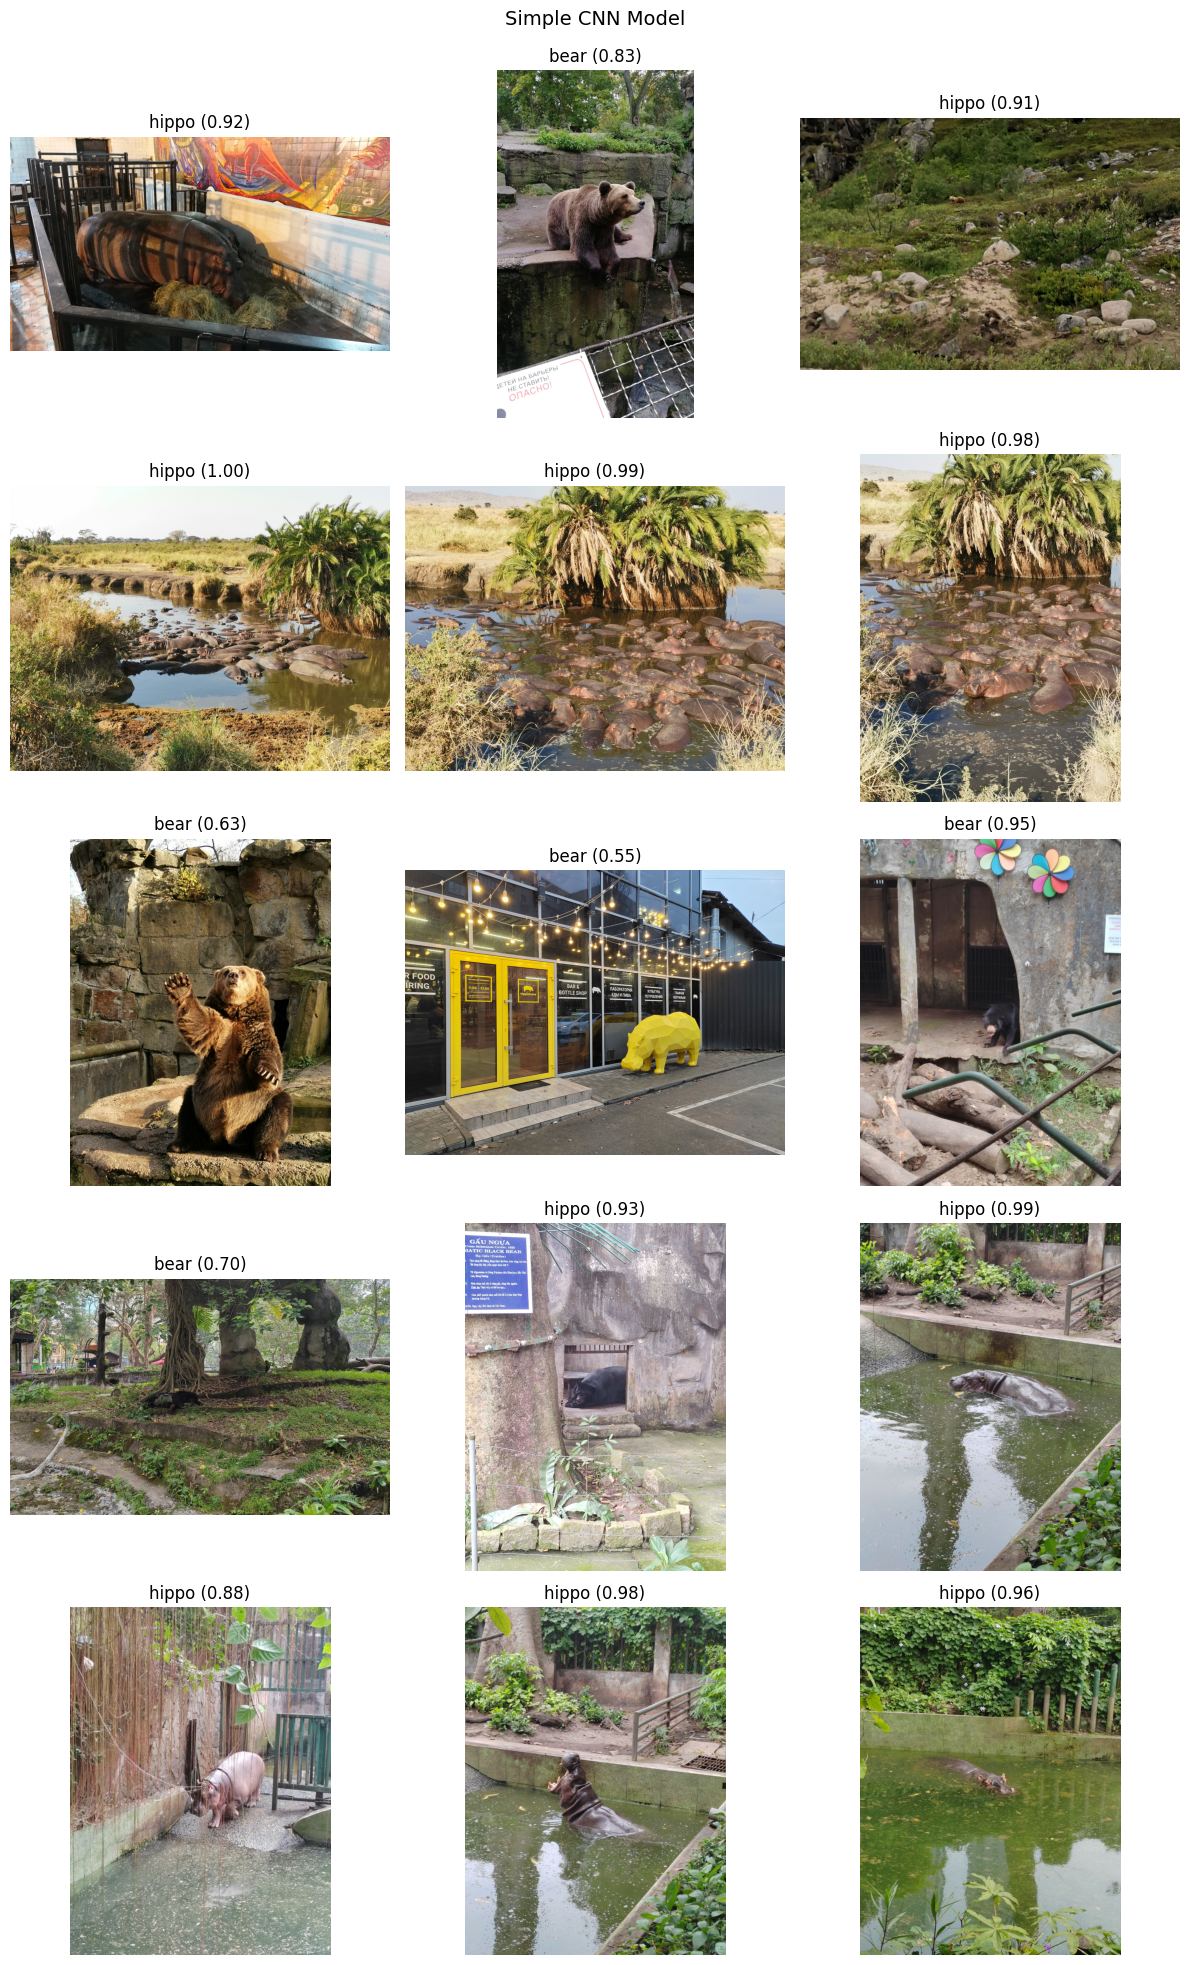

In [11]:
predict_and_plot(simple_cnn_model, test_loader, 'Simple CNN Model', config, device)

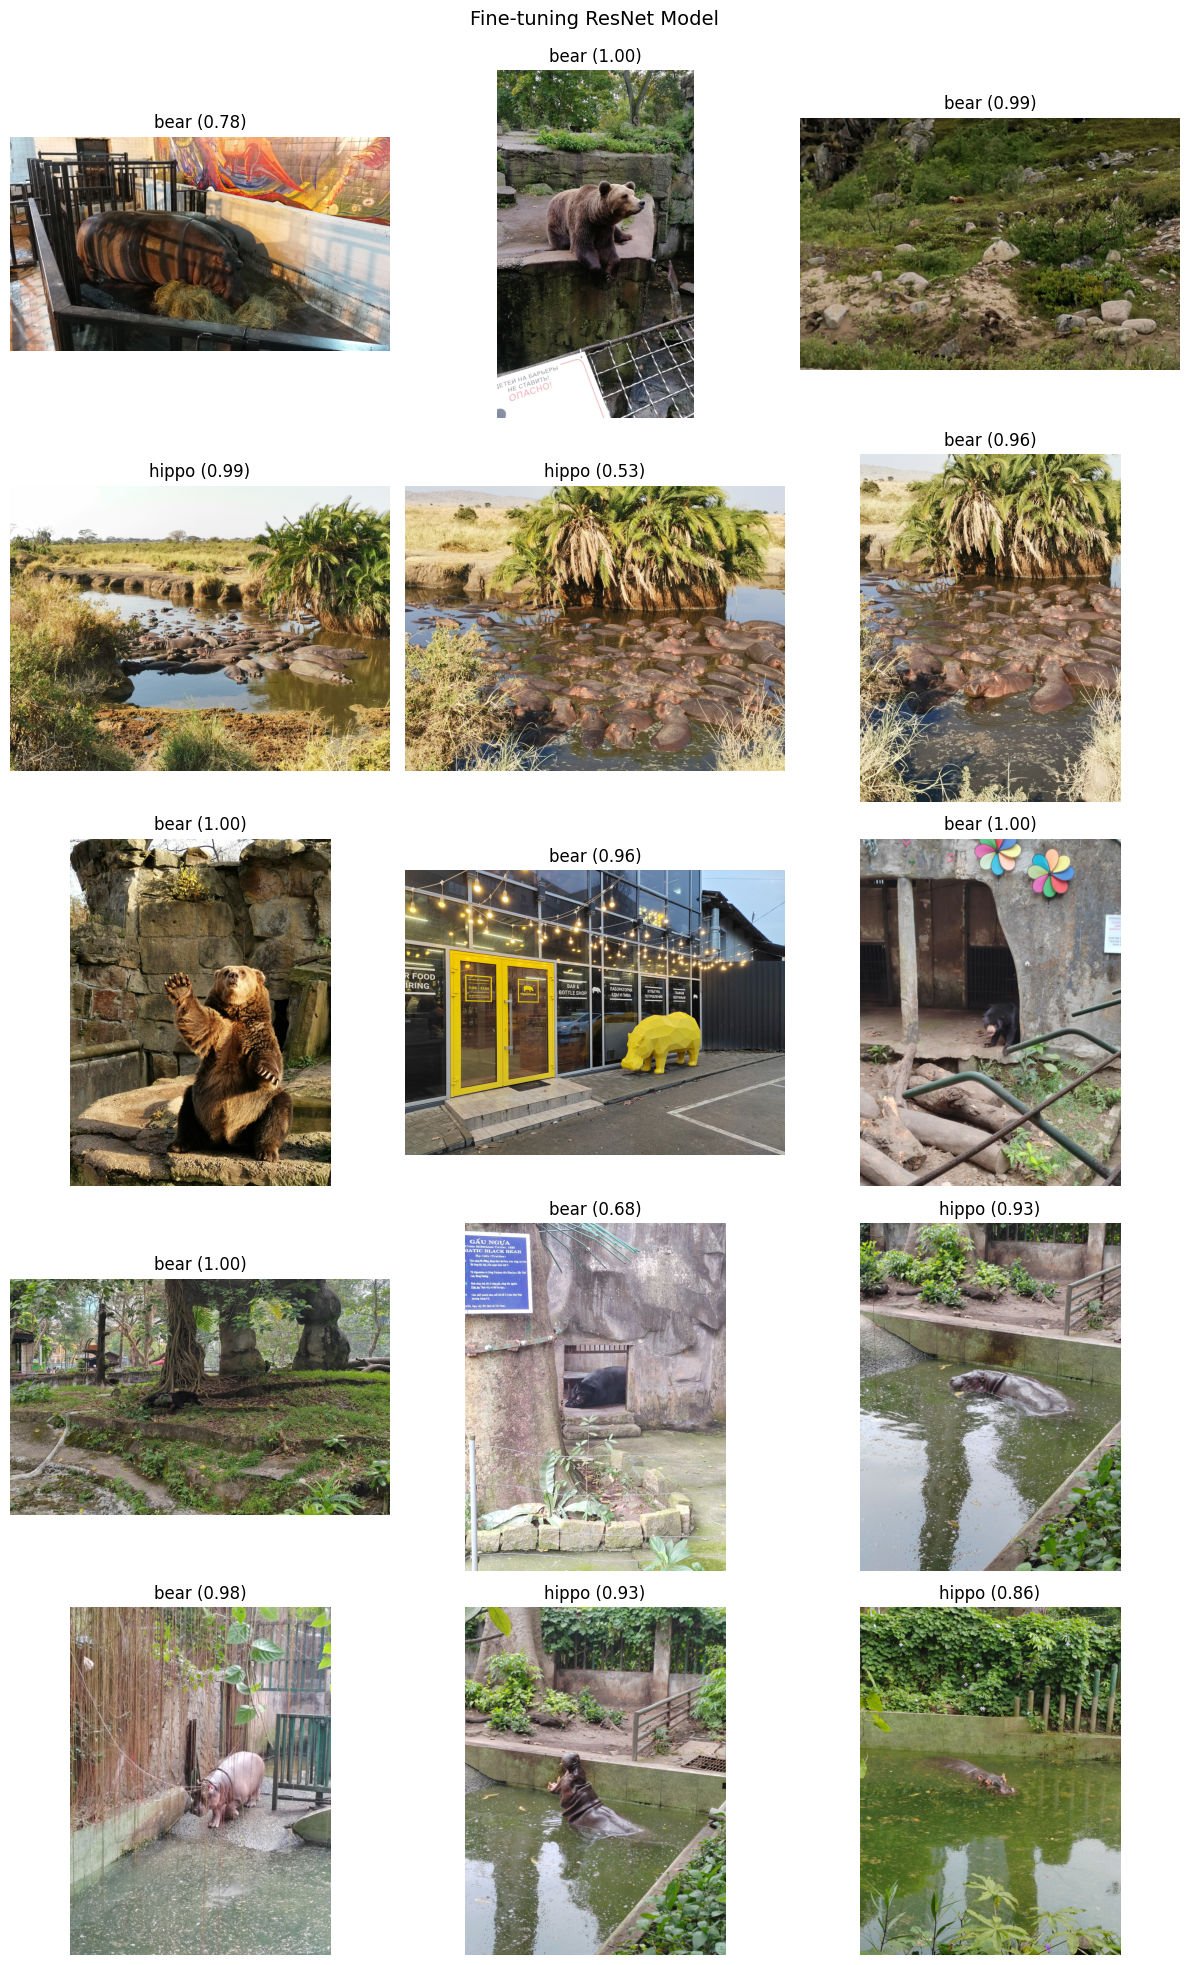

In [12]:
predict_and_plot(resnet_model, test_loader, 'Fine-tuning ResNet Model', config, device)